### Introduction

The database I have chosen to analyze was about trees. It has data representing each specific tree in managed by Pittsburgh in each given neighborhood.
Keep in mind in this dataset, the data does not represent every tree in pittsburgh, just those managed by the city.

Dataset: [Trees](https://data.wprdc.org/dataset/city-trees)

Description: Trees managed by the city of Pittsburgh

In [14]:
import numpy as np
import pandas as pd
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da")
data.head()

/opt/tljh/user/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,754166088,7428,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,Well or Pit,...,Homewood North,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.458169,-79.889724
1,1946899269,220,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,Open or Unrestricted,...,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429269,-80.067868
2,1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,Well or Pit,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035
3,994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,Well or Pit,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276
4,1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,Open or Unrestricted,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106


As you can see there are multiple columns. Most of which are unnecessary. To figure out how many trees are in each area, we simply count the number of times each neighborhood appears on the list.

Text(0, 0.5, 'Number of Trees')

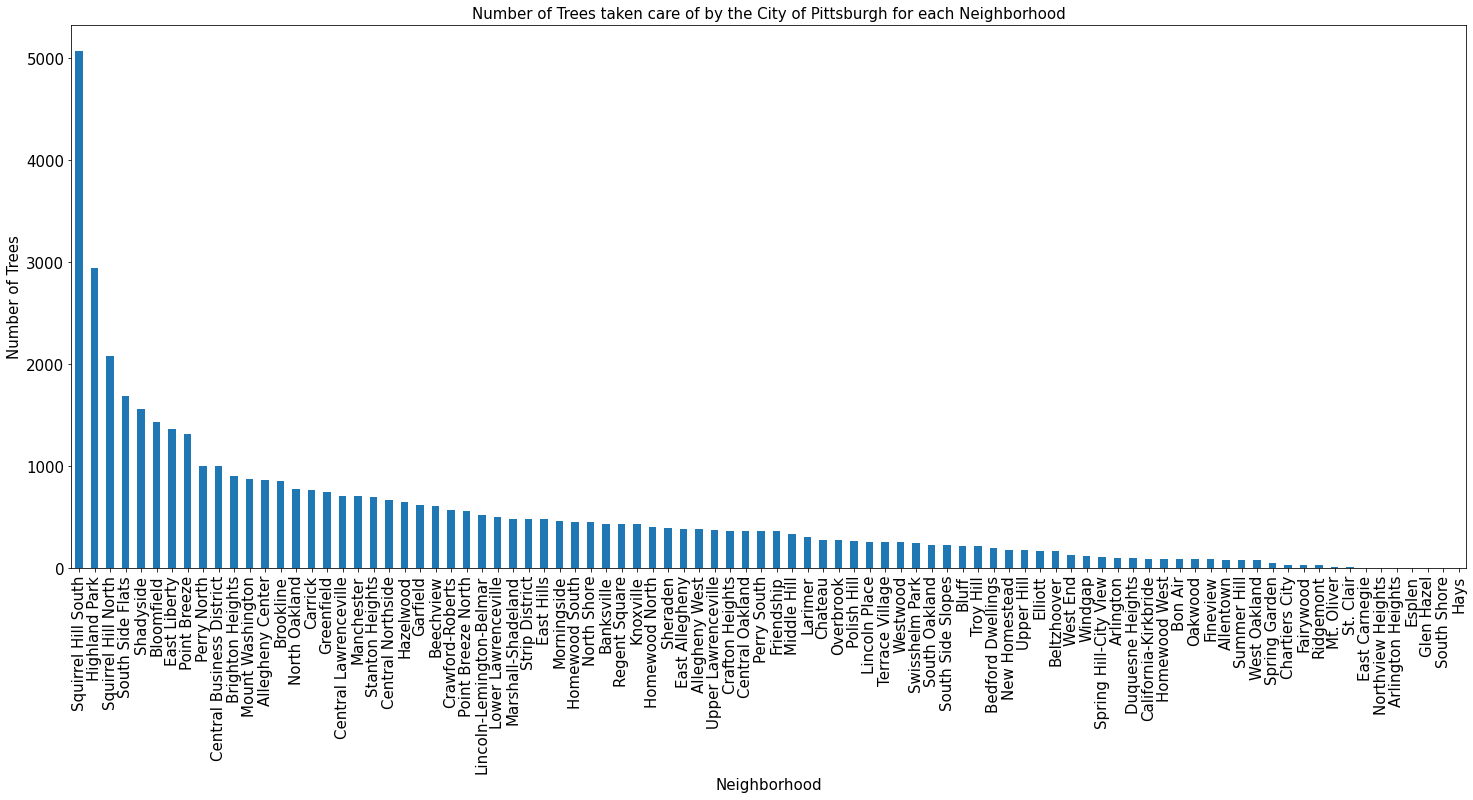

In [17]:
data = data.groupby('neighborhood').count()
sortedData = data[['id']].sort_values(by='id', ascending=False)

Visual = sortedData.plot(kind='bar', figsize=(25,10),legend=False, fontsize=15)

Visual.set_title("Number of Trees taken care of by the City of Pittsburgh for each Neighborhood", fontsize=15)
Visual.set_xlabel('Neighborhood', fontsize = 15)
Visual.set_ylabel('Number of Trees', fontsize = 15)

In [28]:
sortedData.head(5)

,id
neighborhood,
Squirrel Hill South,5073
Highland Park,2941
Squirrel Hill North,2083
South Side Flats,1693
Shadyside,1558


Text(0.5, 1.0, 'Number of trees in each neighborhood managed by Pittsburgh')

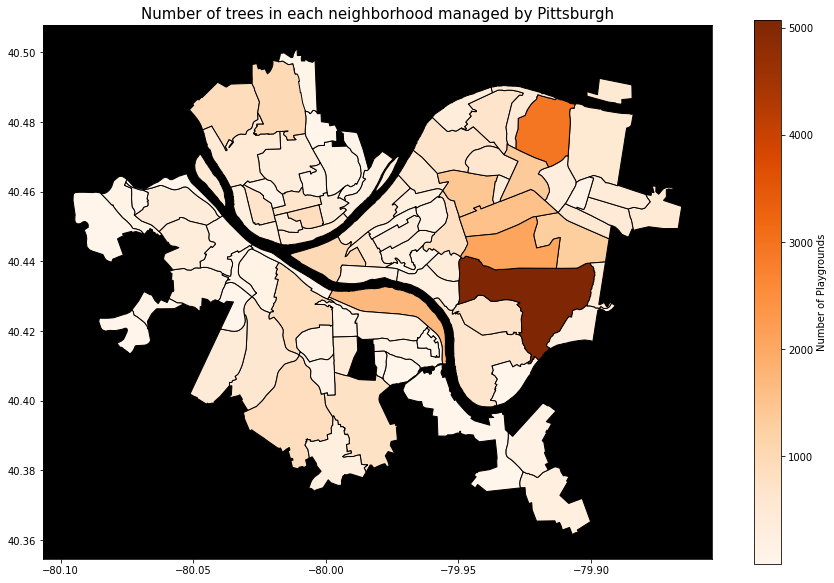

In [31]:
neighborhoods = geopandas.read_file("/home/jupyter-cha56/Final/Final-Project/Neighborhoods/Neighborhoods_.shp")
tree_map = neighborhoods.merge(sortedData, how="left", left_on="hood", right_on="neighborhood")
map = tree_map.plot(column = 'id',
             cmap = 'Oranges',
             edgecolor = "Black",
             legend=True,
             legend_kwds={'label': "Number of Playgrounds"},
             figsize = (15, 10))
map.set_facecolor((0, 0, 0))
map.set_title("Number of trees in each neighborhood managed by Pittsburgh", fontsize = 15)

### Summary

##### To summarize, I can conclude that the top 5 neighborhoods in pittsburgh are:
1. Squirrell Hill South
2. Highland Park
3. Squirrell Hill North
4. South Side Flats
5. Shadyside

The overall best neighborhood in pittsburgh based on the ammount of trees is Squirell Hill South. It is important to once again note the fact that this is not reflective of every tree in the pittsburgh area, just those managed by the city of Pittsburgh. Although this may seem like an issue at first, by realizing the fact the areas where the city takes most care of trees are the 
areas which the city has higher presence in / interest in. It's also interesting to note that there are more trees in the inner city than there are in the outskirts, upon first thought one may think overwise.